# Group 8 Final: Chicago Taxi Data

#### Andrew Shimshock, Claire Zyfers, Mina Tawfik, Robert Konrath, Travis Vickers

### Dataset

### Data Cleanup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')
#see only one time warning
#warnings.filterwarnings(action='once')

In [4]:
df = pd.read_csv('OMIS114bestclean.csv')

In [ ]:
df.head()

### Finding \#1: Taxi Efficieny based on time of day

In [ ]:
df2=df.copy()

Prepare dummies for time of day

In [ ]:
df2['starthour']=df2.time_start.str[0:2]

In [ ]:
df2['starthour'] = df2.starthour.astype(int)

In [ ]:
df2['time_0-6'] = df2.starthour.apply(lambda x: 1.0 if x<=6 else 0.0)

In [ ]:
df2['time_6-12'] = df2.starthour.apply(lambda x: 1.0 if (x<=12 & x>6) else 0.0)

In [ ]:
df2['time_12-18'] = df2.starthour.apply(lambda x: 1.0 if (x<=18 & x>12) else 0.0)

In [ ]:
df2['time_18-24'] = df2.starthour.apply(lambda x: 1.0 if x>18 else 0.0)

In [ ]:
df2.tipper=df.tips.apply(lambda x: 1.0 if x>0 else 0.0)

In [ ]:
df2.head()

Prepare for clustering analysis

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clu = KMeans(n_clusters=3, random_state=0, max_iter=3000)

In [ ]:
df2=df2.drop(['taxi_id','trip_start_timestamp','trip_end_timestamp','pickup_community_area','dropoff_community_area',\
         'payment_type','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',\
         'date_start', 'time_start', 'date_end', 'time_end',\
        'Day_of_week', 'geometry', 'pickup_latitude_cut', 'time_start_compare',\
          'time_end_compare'],axis=1)

In [ ]:
df2=df2[(df2.trip_seconds!=0) & (df2.fare!=0)]

Create variable for whether or not a customer tips

In [ ]:
df2['tipper']=df2.tips.apply(lambda x: 1.0 if x>0 else 0.0)


In [ ]:
df2.head()

Create efficieny variable of trip revenue/trip time

In [ ]:
df2['revenue_per_sec']=df2.trip_total/df2.trip_seconds

In [ ]:
clu

In [ ]:
clu.fit(df2)

In [ ]:
clu.labels_

In [ ]:
df2['cluster'] = clu.labels_

In [ ]:
df2.groupby('cluster').mean()

Clusters 0 and 2 have the most efficiency and have the highest portions of their rides occuring in the time 0-6 and time 18-24 slots. These slots tend to have much lower trip times and and trip times suggesting that shorter trips may be more efficient

In [ ]:
df2.groupby('cluster').size()

In [ ]:
df2['rev_sec_bin']=pd.qcut(df2.revenue_per_sec, 5)

In [ ]:
df2['timebin']=pd.cut(df2.starthour, bins=[0,6,12,18,24])

In [ ]:
sns.catplot(y='revenue_per_sec',x='timebin', kind='bar', data=df2)

In [ ]:
sns.catplot(y='revenue_per_sec',x='timebin', hue='cluster', kind='bar', data=df2)

#### Summary

Rides that occur between the hours of midnight to 6am and 6pm to midnight tend to be the most efficient in terms of revenue per second of ride time.

#### Insight

Taxis that want to make money most efficiently should operate between 6pm and 6am rather than more normal business hours.

### Finding \#2

Create new dataframe with propotionally binned trip miles

In [5]:
dfm = df[(df.payment_type == 'Cash') | (df.payment_type == 'Credit Card')]

In [6]:
dfm2 = dfm[['payment_type', 'trip_total', 'trip_miles']]

In [9]:
dfm2 = dfm2[dfm2.trip_miles != 0]

In [10]:
dfm2['binned_tripmiles']=pd.qcut(dfm2.trip_miles, 5)

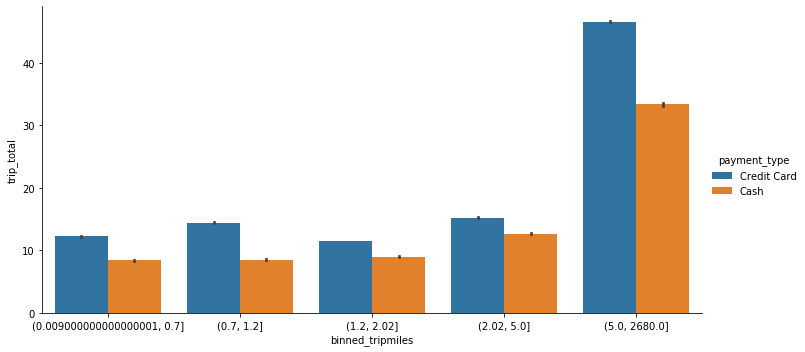

In [12]:
sns.catplot(y='trip_total', data=dfm2, x='binned_tripmiles', aspect=2, kind='bar', hue = 'payment_type')

In [13]:
dfa = df[df.trip_seconds !=0]
dfa = df[df.trip_total != 0]

In [14]:
dfa['cost_per_mile']=dfa.trip_total/dfa.trip_miles

In [18]:
dfaCost = dfa[(dfa.cost_per_mile > .01) & (dfa.cost_per_mile < .7)]

In [16]:
dfa['is_tipper'] = dfa.tips.apply(lambda x: 1.0 if x>0 else 0.0)

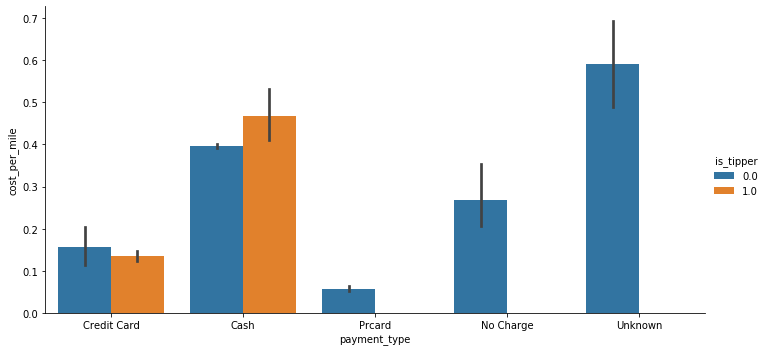

In [19]:
sns.catplot(x='payment_type', y='cost_per_mile', data=dfaCost, hue = 'is_tipper', kind='bar', aspect =2)

#### Summary

The first barplot shows the relationship between trip_miles and trip_total paid with hues on Credit and Cash. The trip_miles are binned with equal frequencies. Credit card payments tended to range higher than cash payments for all distances.

The second barplot shows that Credit Card users typically have a lower cost per mile suggesting that they have longer rides and cash users have a very high cost per mile and this indicates they will spend more time in traffic. 

#### Insight

Credit card users tend to both pay more for every binned distance traveled and on average have a longer trip distance, this leads us to say that credit card users are more likely to tip so all taxi companies should incentivize credit card payments with some sort of discount program. 

### Finding \#3

#### Summary

#### Insight